In [3]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [4]:
WAVEFORM_FOLDER = os.path.join("C:\\", "qudi-hira", "saved_pulsed_assets", "waveform")
# os.listdir(WAVEFORM_FOLDER)

In [5]:
labels = {
    'a_ch0': "In-phase", 
    'a_ch1': "Quadrature", 
    'a_ch2': "", 
    'a_ch3': "", 
    'd_ch0': "Laser trigger", 
    'd_ch1': "Start gate trigger", 
    'd_ch2': "Switch trigger", 
    'd_ch3': "Next gate trigger", 
    'd_ch4': "", 
    'd_ch5': "MW sweep trigger"
}
sample_rate = 1.25e9

In [6]:
def waveform_to_load(folder: str, waveform_name: str,  _labels: dict) -> dict:
    # Initialize all channels to None
    channels = dict.fromkeys(_labels, None) 

    for key in list(channels):
        try:
            filename = f"{waveform_name}_{key}.pkl"
            filepath = os.path.join(folder, filename)
            with open(filepath, 'rb') as f:
                channels[key] = pickle.load(f)
            if not np.any(channels[key]):
                # Delete channels with only zeros
                print(f"{key} -> null")
                del channels[key]  
            else:
                print(f"{key} -> {len(channels[key])}")
        except FileNotFoundError as exc:
            # Delete channels that don't exist on disk
            print(f"{key} not found") 
            del channels[key]
    return channels

def plot_channels(_channels: dict, _sample_rate: float = 1.25e9, lower: int = 0, upper: int = -1) -> plt.Figure:
    if len(_channels) == 1: # Single channel plotting
        size_x, size_y = 8, 5
    else:
        size_x, size_y = len(_channels) * 1.3, len(_channels)

    fig, ax = plt.subplots(nrows=len(_channels), sharex=True, figsize=(size_x, size_y))

    # Correct for matplotlib's (silly) behavior for single plots
    if not isinstance(ax, np.ndarray): 
        ax = [ax]
        
    for idx, key in enumerate(channels):
        #time_in_us = np.linspace(0, len(_channels[key][:limit]) / 1.25e9, len(_channels[key][limit:])) * 1e6
        time_in_us = np.linspace(0, len(_channels[key][lower:upper]) / _sample_rate, len(_channels[key][lower:upper])) * 1e6

        if key.startswith('a_'):
            ax[idx].plot(time_in_us, _channels[key][lower:upper], ".-", linewidth=0.5, color=f"C{idx}")
        else:
            ax[idx].plot(time_in_us, _channels[key][lower:upper],"-", color=f"C{idx}")
        ax[idx].set_title(f'{key} ({labels[key]})')
        
    ax[-1].set_xlabel("Time (μs)")
    return fig

In [20]:
waveform_name = 't1'
channels = waveform_to_load(WAVEFORM_FOLDER, waveform_name, labels)

a_ch0 -> null
a_ch1 -> null
a_ch2 -> null
a_ch3 -> null
d_ch0 -> 112628750
d_ch1 -> 112628750
d_ch2 -> 112628750
d_ch3 -> 112628750
d_ch4 -> null
d_ch5 -> null


a_ch0 -> null
a_ch1 -> null
a_ch2 -> null
a_ch3 -> null
d_ch0 -> 2612682
d_ch1 -> 2612682
d_ch2 -> 2612682
d_ch3 -> 2612682
d_ch4 -> null
d_ch5 -> null


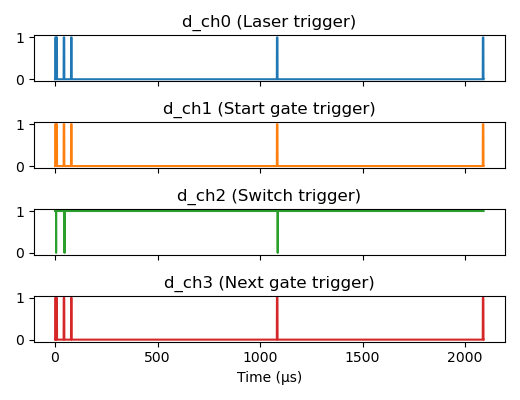

In [19]:
%matplotlib widget
waveform_name = 't1_exp'
channels = waveform_to_load(WAVEFORM_FOLDER, waveform_name, labels)
fig = plot_channels(channels, sample_rate)
fig.tight_layout()